# MICROSOFT MOVIE INSIGHTS.

# 1.OVERVIEW.

# a) Background of the business.

Microsoft, a technology giant with a strong presence in software, cloud computing, and consumer electronics, is venturing into the entertainment industry by establishing its own movie studio. This strategic move is a response to the growing demand for original video content and the success of tech companies in the entertainment sector. Microsoft recognizes the potential for expansion beyond its traditional tech offerings and aims to leverage its resources and expertise to create compelling and profitable films.

# b)Domain Of The Business.

The domain of Microsoft's movie studio encompasses the production and distribution of feature films for both traditional cinema and digital streaming platforms. The studio will operate within the broader entertainment and media industry, competing with established film studios and streaming services. Microsoft's entry into this domain will focus on the creation of diverse, high-quality content, including a mix of genres and innovative storytelling formats, to capture the attention of global audiences

# 2. BUSINESS UNDERSTANDING

# a) Introduction.

The film industry is a dynamic and a highly competetive industry where success or failure of a movie can have significant
financial implications in movie authors and the actors. Understanding the factors that contribute to a film performance at
the box office comes so handy and crucial to the filmmakers,productions studios, and investors. This project therefore aims
at exploring film performance at the box office using Data Analysis techniques in order to gain insights and make informed decisions.



# b) Problem statement.

This project adresses the challenge of identifying the key factors that influence the 
film success at box office. By analyzing a dataset of films box office revenues, we aim to 
uncover patterns,trends and relationships between different variables such as movie title,
budgets, release dates and revenue.

# c) Objectives.
1. Explore performance of different genres and their corresponding revenues to identify    genre speific trends.
2. Investigate the relationship between budget and revenue to determine the impact of     investment on film success.
3. Examine the average revenue per month to identify seasonal trends and patterns.
4. Analyze the total film revenue per year to understand the overall performance of the industry overtime.

# 3.NOTEBOOK STRUCTURE

1. Importing data
2. Reading the Data.
3. Data Cleaning.
4. Exploratory Data Analysis.
5. Conclusions
6. Recommendations

# 1.Importing data

In [1]:
#importing libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1.Reading the data

In [2]:
# Loading data from bom.movies_gross
bom_movie = pd.read_csv("zipped data/bom.movie_gross.csv.gz")
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
# Loading data from tmdb.movies
tmdb_movies=pd.read_csv("zipped data/tmdb.movies.csv.gz")
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [4]:
#loading data from tn.movie_budgets
tn_movie_budgets = pd.read_csv("zipped data/tn.movie_budgets.csv.gz")
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
# Loading IM database

#Establishing the connection
conn = sqlite3.connect("zipped data/im.db") 
# Selecting tables in the database
query = """SELECT name FROM sqlite_master WHERE type='table';"""
im_db = pd.read_sql(query,conn)
im_db



,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


# 3.Data cleaning

# <small>a) Cleaning Bom_movie set </small>

In [75]:
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [76]:
# checking the columns of the data set using function
def data_column(data):
    cols = list(data.columns)

    return cols

data_column(bom_movie)

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

In [77]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [78]:
# checking for missing values in the dataset
def check_missing_values(data):
    return bom_movie.isnull().sum().sort_values(ascending= False)

check_missing_values(bom_movie)


foreign_gross     1350
domestic_gross      28
studio               5
year                 0
title                0
dtype: int64

In [79]:
# checking for duplicates 

def check_duplicates(data):
    return bom_movie.duplicated().sum()

check_duplicates(bom_movie)


0

In [80]:
def column_summary_statistics(data):
    return bom_movie.describe()
column_summary_statistics(bom_movie)


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [81]:
# checking duplicates under title column
def check_duplicates(data = "title"):
    return bom_movie["title"].duplicated().sum()

check_duplicates(bom_movie)


1

In [82]:
# dropping  the missing values in studio column
bom_movie.dropna(subset= ["studio"], inplace = True)

In [83]:
#dropping missing values in domestic_gross column
bom_movie.dropna(subset = ['domestic_gross'], inplace = True)

In [84]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [85]:
#Converting foreign_gross column to numeric values by removing the string comma
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].str.replace(',','')

In [86]:
# Change data type for column foreign_gross  to float
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].astype(float)

In [87]:
# Since the distribution of foreign_gross is right skewed we'll use median to replace our misssing data
bom_movie['foreign_gross'].fillna(bom_movie['foreign_gross'].mean(), inplace = True)

In [88]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [89]:
# Converting the bom_movie dataframe to datetime format
# changing year column to string
bom_movie.year = bom_movie.year.astype("str")

# creating Date column which is an aggregation of month and year columns
bom_movie["Date"] = bom_movie[["year"]].agg(' '.join, axis=1)

# converting to datetime format
bom_movie["Date"] = pd.to_datetime(bom_movie['year'])
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year,Date
0,Toy Story 3,BV,415000000.0,652000000.0,2010,2010-01-01
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,2010-01-01
3,Inception,WB,292600000.0,535700000.0,2010,2010-01-01
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,2010-01-01


# <small> b) Cleaning IM Database  </small>

In [90]:
#loading the tables of the im_db 
im_db.head()

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings


In [91]:
#selecting from movie_ratings table
im_db = pd.read_sql(""" SELECT*  FROM movie_ratings;""",conn)
im_db


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [92]:
# checking distribution of dataset in the table movie_ratings in im_db
im_db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [93]:
# checking for duplicates in the table
def check_duplicates(data):
    return im_db.duplicated().sum()

check_duplicates(im_db)

0

In [94]:
# checking duplicates in movie_id column
def check_duplicates(data= "movie_id"):
    return im_db["movie_id"].duplicated().sum()

check_duplicates(im_db)

0

In [95]:
#checking for missing values
def check_missing_values(data):
    return im_db.isnull().sum()

check_duplicates(im_db)

0

In [96]:
im_db.shape

(73856, 3)

# <small>c) Cleaning Tmdb_ Movies</small>

In [97]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [98]:
#checking the shape of the dataset
tmdb_movies.shape

(26517, 10)

In [99]:
#checking number of columns using funtions
def check_columns(data):
    cols= list(data.columns)

    return cols
    
check_columns(tmdb_movies)

['Unnamed: 0',
 'genre_ids',
 'id',
 'original_language',
 'original_title',
 'popularity',
 'release_date',
 'title',
 'vote_average',
 'vote_count']

In [100]:
#checking the information of the all dataset
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [101]:
# checking duplicates
def check_duplicates(data):
    return tmdb_movies.duplicated().sum()

check_duplicates(tmdb_movies)
    

0

In [102]:
#checking for duplicates in id column
def check_duplicates(data= "id"):
    return tmdb_movies["id"].duplicated().sum()

check_duplicates(tmdb_movies)
    

1020

In [103]:
#drop duplicates and keep the first
tmdb_movies.drop_duplicates(subset= "id", keep="first", inplace=True)

In [104]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         25497 non-null  int64  
 1   genre_ids          25497 non-null  object 
 2   id                 25497 non-null  int64  
 3   original_language  25497 non-null  object 
 4   original_title     25497 non-null  object 
 5   popularity         25497 non-null  float64
 6   release_date       25497 non-null  object 
 7   title              25497 non-null  object 
 8   vote_average       25497 non-null  float64
 9   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [105]:
# dropping unnamed column: 0 column

tmdb_movies = tmdb_movies.drop("Unnamed: 0", axis=1)


In [106]:
# statistics view of the dataset
tmdb_movies.describe()

,id,popularity,vote_average,vote_count
count,25497.000000,25497.000000,25497.000000,25497.000000
mean,294203.960505,3.043279,5.979331,178.795780
std,154690.249660,4.261045,1.866094,914.150311
min,27.000000,0.600000,0.000000,1.000000
25%,154770.000000,0.600000,5.000000,1.000000
50%,307125.000000,1.321000,6.000000,5.000000
75%,420707.000000,3.490000,7.000000,25.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [107]:
# checking for missing values.
def check_missing_values(data):
    return tmdb_movies.isnull().sum().sort_values(ascending= False)
   

check_missing_values(tmdb_movies)

vote_count           0
vote_average         0
title                0
release_date         0
popularity           0
original_title       0
original_language    0
id                   0
genre_ids            0
dtype: int64

In [108]:
# Change the column release_date to datetime format
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])

In [109]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          25497 non-null  object        
 1   id                 25497 non-null  int64         
 2   original_language  25497 non-null  object        
 3   original_title     25497 non-null  object        
 4   popularity         25497 non-null  float64       
 5   release_date       25497 non-null  datetime64[ns]
 6   title              25497 non-null  object        
 7   vote_average       25497 non-null  float64       
 8   vote_count         25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.9+ MB


# <small>d) Cleaning Tn_Movie_ Budgets </small>

In [110]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [111]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [112]:
# checking for duplicates 
tn_movie_budgets.drop_duplicates()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [113]:
# We will need to fix structural issues like remove characters from integer values
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in columns_to_clean:
    tn_movie_budgets[col] = tn_movie_budgets[col].str.replace(r'\D', '', regex = True).astype(float)
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [114]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [115]:
#checking duplicates in movie and id columns
def check_duplicates(data= "id"):
    return tn_movie_budgets["id"].duplicated().sum()

check_duplicates(tn_movie_budgets)

5682

In [116]:
#dropping the duplicate in id column
tn_movie_budgets.drop_duplicates(subset= "movie", keep="first", inplace=True)

In [117]:
#checking duplicates in movie and id columns
def check_duplicates(data= "movie"):
    return tn_movie_budgets["movie"].duplicated().sum()

check_duplicates(tn_movie_budgets)

0

In [118]:
tn_movie_budgets.drop_duplicates(subset= "id", keep="first", inplace=True)

In [119]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   release_date       100 non-null    object 
 2   movie              100 non-null    object 
 3   production_budget  100 non-null    float64
 4   domestic_gross     100 non-null    float64
 5   worldwide_gross    100 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 5.5+ KB


# Selecting columns needed for further analysis after cleaning in the entire dataset

In [120]:
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year,Date
0,Toy Story 3,BV,415000000.0,652000000.0,2010,2010-01-01
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,2010-01-01
3,Inception,WB,292600000.0,535700000.0,2010,2010-01-01
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,2010-01-01


In [121]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3356 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   foreign_gross   3356 non-null   float64       
 4   year            3356 non-null   object        
 5   Date            3356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 183.5+ KB


In [122]:
#selecting column need for our study
im_db = im_db[["movie_id", "averagerating"]]

im_db.head()


,movie_id,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


In [123]:
# selecting columns needed for our study in tmdb movies
tmdb_movies = tmdb_movies[['id','release_date','title','vote_average']]

tmdb_movies.head()


,id,release_date,title,vote_average
0,12444,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7
1,10191,2010-03-26,How to Train Your Dragon,7.7
2,10138,2010-05-07,Iron Man 2,6.8
3,862,1995-11-22,Toy Story,7.9
4,27205,2010-07-16,Inception,8.3


In [124]:
#selecting the columns needed for our study in movie budgets
tn_movie_budgets = tn_movie_budgets[['release_date','movie','production_budget','domestic_gross','worldwide_gross']]

# Change the column release_date to datetime format
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])


tn_movie_budgets.head()

<ipython-input-124-5a1886a868e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [125]:
# Renaming the column worldwide_gross to enable easy merging of the datasets

tn_movie_budgets.rename(columns={'movie':'title'}, inplace=True)
tn_movie_budgets.rename(columns ={'worldwide_gross': 'foreign_gross'}, inplace=True)

c:\Users\amban\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [126]:
tn_movie_budgets.head()

,release_date,title,production_budget,domestic_gross,foreign_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [127]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       100 non-null    datetime64[ns]
 1   title              100 non-null    object        
 2   production_budget  100 non-null    float64       
 3   domestic_gross     100 non-null    float64       
 4   foreign_gross      100 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 4.7+ KB


In [128]:
# Dropping data from the tmdb_movies that have release_dates before 2010

start_date = '2010-01-01'
end_date = '2018-12-31'
tmdb_movies = tmdb_movies[
    (tmdb_movies['release_date'] >= start_date) & (tmdb_movies['release_date'] <= end_date)]


In [129]:
tmdb_movies.head()

,id,release_date,title,vote_average
0,12444,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7
1,10191,2010-03-26,How to Train Your Dragon,7.7
2,10138,2010-05-07,Iron Man 2,6.8
4,27205,2010-07-16,Inception,8.3
5,32657,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1


 # JOINING DATASETS

In [130]:
# Join bom_movie and tn_movie_budget based on release_dates for analysis
 
movie_budget_join = bom_movie.merge(tn_movie_budgets, on='title', how= 'inner')
movie_final_join = movie_budget_join.merge(tmdb_movies, on='title',how = 'inner')



In [131]:
movie_final_join.head()

,title,studio,domestic_gross_x,foreign_gross_x,year,Date,release_date_x,production_budget,domestic_gross_y,foreign_gross_y,id,release_date_y,vote_average
0,Toy Story 3,BV,415000000.0,652000000.0,2010,2010-01-01,2010-06-18,200000000.0,415004880.0,1.068880e+09,10193,2010-06-17,7.7
1,Tangled,BV,200800000.0,391000000.0,2010,2010-01-01,2010-11-24,260000000.0,200821936.0,5.864772e+08,38757,2010-11-24,7.5
2,Robin Hood,Uni.,105300000.0,216400000.0,2010,2010-01-01,2010-05-14,210000000.0,105487148.0,3.224590e+08,20662,2010-05-14,6.3
3,Robin Hood,Uni.,105300000.0,216400000.0,2010,2010-01-01,2010-05-14,210000000.0,105487148.0,3.224590e+08,114612,2013-01-31,5.7
4,Robin Hood,Uni.,105300000.0,216400000.0,2010,2010-01-01,2010-05-14,210000000.0,105487148.0,3.224590e+08,375588,2018-11-21,5.8


In [132]:
# Select the relevant columns from the final dataframe
movie_final_join = movie_final_join.drop(['domestic_gross_x','foreign_gross_x','release_date_x','release_date_y'], axis= 1)


In [133]:
movie_final_join.head()

,title,studio,year,Date,production_budget,domestic_gross_y,foreign_gross_y,id,vote_average
0,Toy Story 3,BV,2010,2010-01-01,200000000.0,415004880.0,1.068880e+09,10193,7.7
1,Tangled,BV,2010,2010-01-01,260000000.0,200821936.0,5.864772e+08,38757,7.5
2,Robin Hood,Uni.,2010,2010-01-01,210000000.0,105487148.0,3.224590e+08,20662,6.3
3,Robin Hood,Uni.,2010,2010-01-01,210000000.0,105487148.0,3.224590e+08,114612,5.7
4,Robin Hood,Uni.,2010,2010-01-01,210000000.0,105487148.0,3.224590e+08,375588,5.8


# 4.EXPLORATORY DATA ANALYSIS (EDA)

In [134]:
#summarry statistical description of the cleaned data.

movie_final_join.describe()

,production_budget,domestic_gross_y,foreign_gross_y,id,vote_average
count,6.500000e+01,6.500000e+01,6.500000e+01,65.000000,65.000000
mean,2.160569e+08,2.617811e+08,7.515392e+08,150334.184615,6.632308
std,4.456620e+07,1.650652e+08,4.042403e+08,114318.999389,0.810306
min,1.750000e+08,4.047937e+07,1.800478e+08,1865.000000,4.400000
25%,1.850000e+08,1.301687e+08,3.931513e+08,54138.000000,6.000000
50%,2.000000e+08,2.339215e+08,7.435883e+08,105864.000000,6.700000
75%,2.300000e+08,3.342011e+08,1.045664e+09,260513.000000,7.300000
max,4.106000e+08,7.000596e+08,2.048134e+09,375588.000000,8.300000


# <small>Data visualization</small>

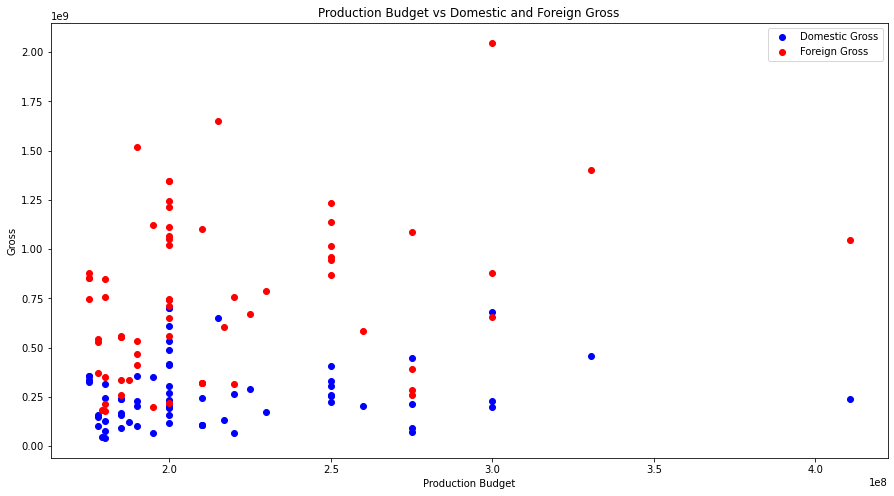

In [135]:
# Scatter plot of production budget vs domestic and foreign gross

plt.figure(figsize=(15, 8))
plt.scatter(movie_final_join['production_budget'], movie_final_join['domestic_gross_y'], color='blue', label='Domestic Gross')
plt.scatter(movie_final_join['production_budget'], movie_final_join['foreign_gross_y'], color='red', label='Foreign Gross')
plt.xlabel('Production Budget')
plt.ylabel('Gross')
plt.title('Production Budget vs Domestic and Foreign Gross')
plt.legend()
plt.show()

The graph represent a scatter plot showing the relationship between Production Budget between domestic and foreign gross.It is a positive relationship since it implies that a higher production budget will lead to higher gross specifically from the foreign market which is represented by the red dots.

Microsoft should mainly focuse on producing movies for the foreign market more comapaired to producing for the domestic market. The foreign market implies the rest of the world in this case.

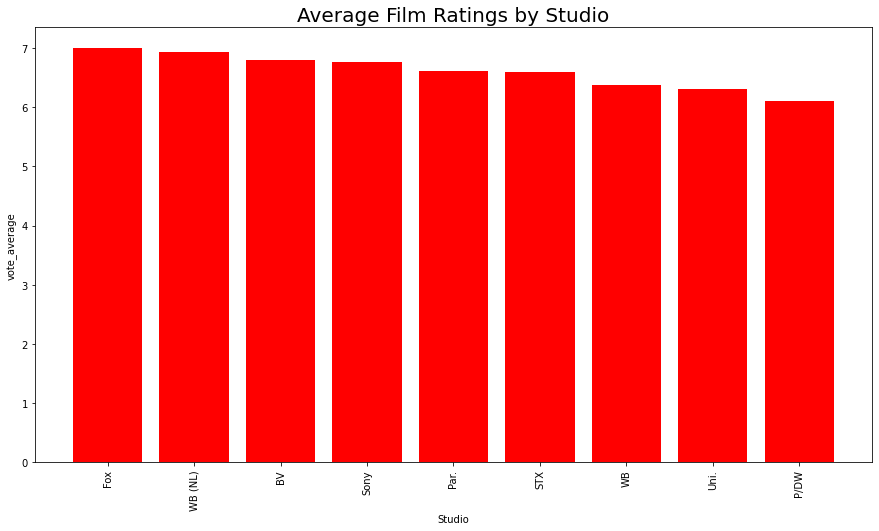

In [136]:
# Grouping the data by studio and calculate the average rating
average_ratings = movie_final_join.groupby('studio')['vote_average'].mean()

# Sort the average ratings in descending order
sorted_ratings = average_ratings.sort_values(ascending=False)

# Plot the average ratings by studio
plt.figure(figsize=(15, 8))
plt.bar(sorted_ratings.index, sorted_ratings.values,color = 'red')
plt.xlabel('Studio')
plt.ylabel('vote_average')
plt.title('Average Film Ratings by Studio',fontsize= 20)
plt.xticks(rotation=90)
plt.show()

We may compare film ratings across studios using the bar plot, which shows the average rating for each studio's films.We can determine whether studios often have higher or lower ratings in comparison to others by looking at the heights of the plots. According to the results, FOX studio generally does pretty well.

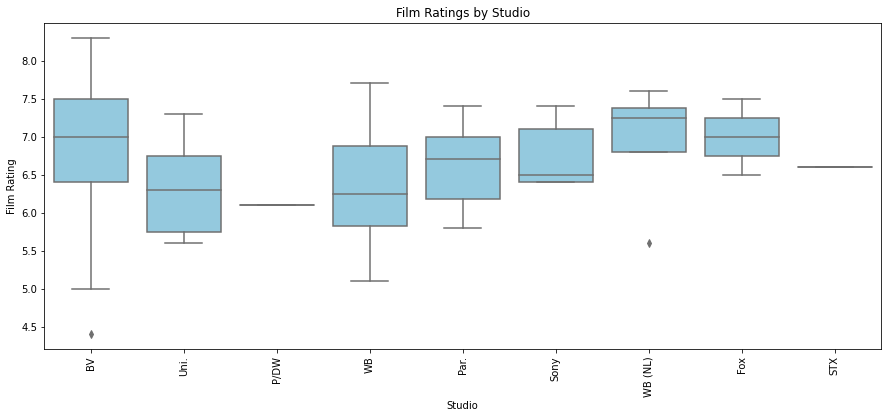

In [137]:
# Create a box plot of film ratings by studio
plt.figure(figsize=(15, 6))
sns.boxplot(data=movie_final_join, x='studio', y='vote_average', color = 'skyblue')
plt.xlabel('Studio')
plt.ylabel('Film Rating')
plt.title('Film Ratings by Studio')
plt.xticks(rotation=90)
plt.show()

The variances in the distribution of various film ratings may be seen by examining the box plots of these various studios. We can also look at potential distinctions and affinities between studios and determine which one you will heartily suggest.

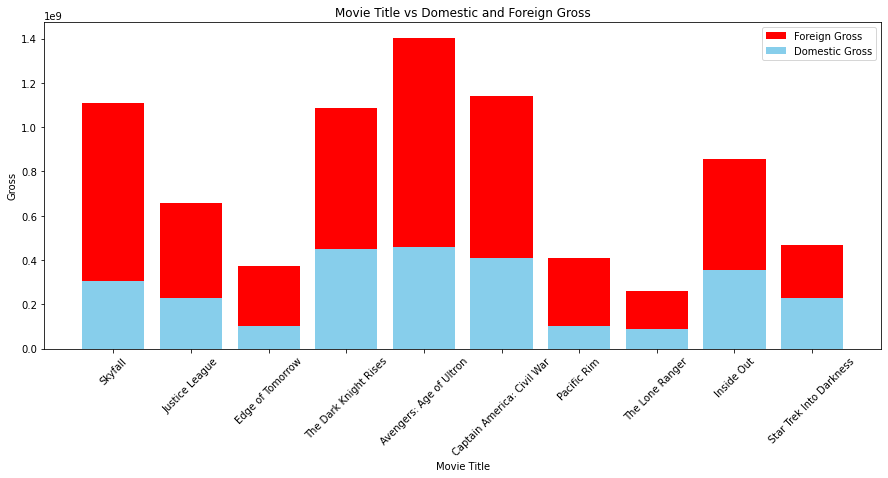

In [138]:
# Bar plot to show movie title vs Domestic and Foreign Gross
 # Selecting 10 random movies
subset_df = movie_final_join.sample(10) 
# Plot movie titles against domestic and foreign gross
plt.figure(figsize=(15, 6))
plt.bar(subset_df['title'], subset_df['foreign_gross_y'], color='red', label='Foreign Gross')
plt.bar(subset_df['title'], subset_df['domestic_gross_y'], color='skyblue', label='Domestic Gross')
plt.xlabel('Movie Title')
plt.ylabel('Gross')
plt.title('Movie Title vs Domestic and Foreign Gross')
plt.legend()
plt.xticks(rotation=45)
plt.show()

The Bar plot  show movie title vs Domestic and Foreign Gross.
it is evident that foreign gross is relatively higher than the Domestic gross, implying that microsoft should make good movies like the furious 7 movie genre and sell it to the foreign market.

# 6.Conculusion

From the data analysis i came up with the following conculusions:

1.A film's budget and income are positively correlated, indicating that higher production costs typically result in better returns.

2.Certain studios consistently generate higher revenues indicating their strong position in the industry. This can help microsoft make informed decisions on competing with the studios best on the production of good genres of movies

3.Fox has the highest rating in film production compaired to other studios. This means microsoft should study what fox studios do to their best for them to attract those numbers in production of the films.



# 7.Recommendation

 The following are my recommendation from the analysis:

 1).Budget Allocation: Efficient and strategic budget allocation holds paramount importance in the film industry, primarily because larger budgets can significantly enhance production value, thereby attracting a broader viewership base. To make informed decisions regarding the optimal budget for a film project, it is imperative to conduct a comprehensive assessment that encompasses several key factors. Firstly, one must carefully consider the genre of the film, as different genres necessitate varying levels of financial investment to effectively capture their essence and appeal to their respective audiences. Secondly, the target audience should be meticulously identified and analyzed, as their preferences, demographics, and expectations play a pivotal role in determining the budget's allocation across various aspects of production, marketing, and distribution. Lastly, thorough market demand analysis is essential, as it informs budget decisions by gauging the competitive landscape, audience trends, and potential return on investment. By meticulously weighing these factors, a filmmaker or production team can make well-informed choices regarding budget allocation, ultimately optimizing the chances of creating a successful and financially rewarding cinematic endeavor."


 2).Genre Analysis and Targeting: In order to maximize success in the film industry, it's essential to evaluate both the financial potential and audience preferences across various genres and strategically select those that align with the production studio's strengths and consumer demand.

 3).Strategic Release Dates: Prior to scheduling film releases, it is crucial to carefully consider and analyze the prevailing seasonal trends and patterns in box office performance, as these insights can significantly impact a movie's success and profitability. Understanding the ebb and flow of audience preferences throughout the year, including peak movie-going seasons and periods of reduced cinema attendance, can inform strategic decisions related to release dates, marketing campaigns, and resource allocation, ultimately increasing the chances of achieving optimal box office results.


 4).Collaboration and Partnership: As part of a comprehensive strategy, it is advisable to actively explore opportunities for collaborations and partnerships with well-established studios, renowned directors, industry professionals, and actors who boast a proven track record of consistently delivering successful box office performances. Such strategic alliances not only bring invaluable expertise and experience into your projects but also enhance the overall credibility and marketability of your films. By aligning your endeavors with individuals and entities known for their box office prowess, you can tap into existing fan bases, access wider distribution networks, and substantially increase the potential for achieving remarkable financial success and cultural impact within the ever-competitive film industry.